2021-06-01 00:00:00 <class 'cftime._cftime.DatetimeGregorian'>


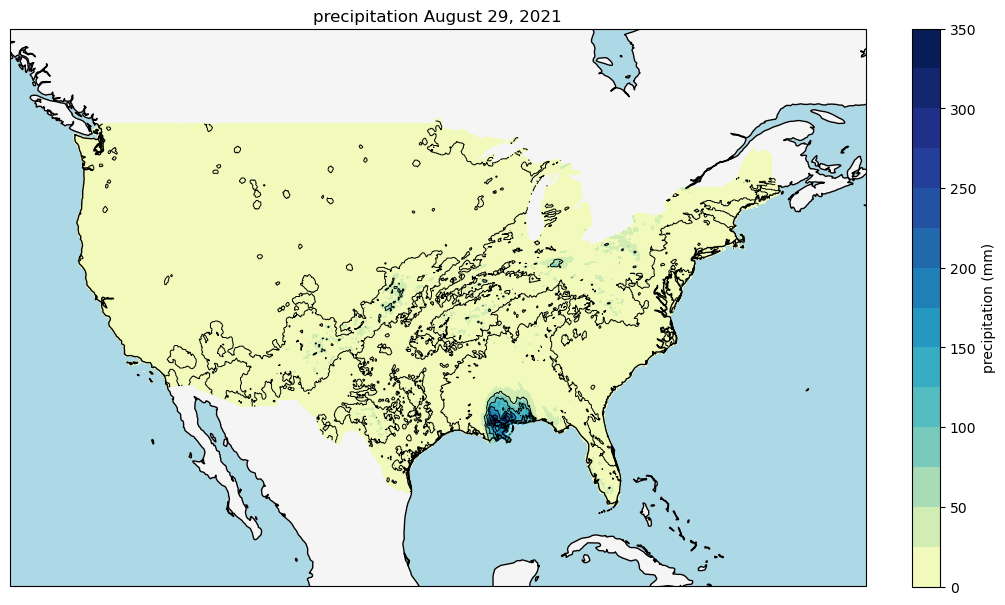

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import PowerNorm, LogNorm
from datetime import datetime
from netCDF4 import Dataset, num2date
from datetime import datetime
import imageio
import matplotlib.colors as mcolors

variable_names = ['precipitation_amount', 'relative_humidity', 'mean_vapor_pressure_deficit', 'surface_downwelling_shortwave_flux_in_air', 'potential_evapotranspiration', 'relative_humidity']
file_names = ['pr', 'rmax', 'vpd', 'srad', 'pet', 'rmin']
long_names = ['precipitation', 'maximum relative humidity', 'vapour pressure deficit', 'downward_shortwave_radiation', 'potential evapotranspiration', 'minimum relative humidity']
index_needed = 0
variable_name = variable_names[index_needed]
long_name = long_names[index_needed]
file_name = file_names[index_needed]



def contour(target_date, variable_name, long_name, file_name,  other_variable_name=None, other_long_name=None, other_file_name=None):
    data = Dataset(f'../../data/{file_name}.nc', mode='r') #get the data
    data2 = None
    if other_file_name is not None: # we use this thing only if we are plotting contours of another file over this one
        data2 = Dataset(f'../../data/{other_file_name}.nc', mode='r')
    lat1 = data.variables['lat'][:]
    lon1 = data.variables['lon'][:]
    time = data.variables['day'][:]  # Replace 'day' with the actual time variable in your file
    time_units = data.variables['day'].units  # Get time units
    dates = num2date(time, time_units)
    print(dates[0], type(dates[0]))
    cmap = 'jet'
    if file_name == 'pr':
        cmap='YlGnBu'
    elif file_name == 'rmax':
            cmap='YlGnBu'
    elif file_name == 'vpd':
            cmap='YlGnBu'
    else:
            cmap='YlOrRd'
    # if file_name != 'rmax':
    #     return
    date_index = next((i for i, date in enumerate(dates) if date == target_date), None)

    if date_index is not None:
        # Extract the data for the specified date
        var = data.variables[variable_name][date_index, :, :]  # Replace with your variable name
        if data2 is not None:
                var2 = data2.variables[other_variable_name][date_index,:,:]

        vmin = np.min(var)
        vmax = np.max(var)

        # Create meshgrid for latitude and longitude
        lon, lat = np.meshgrid(lon1, lat1)

        # Set up the map with Cartopy (using PlateCarree projection here)
        fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

        ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())  # change latitude and longitude bounds as we know it is usa

        ax.set_aspect(1.3)  # adjust aspect ratio to make inner map taller

        # Add ocean and land features but don't add state borders to avoid confusion
        ax.add_feature(cfeature.OCEAN, zorder=0, color='lightblue')  # Ocean background
        ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', color='whitesmoke')  # Land background
        ax.coastlines(resolution='50m', color='black', linewidth=1)  # Coastlines

        # Plot the filled contour map with PowerNorm for scaling
        
        if variable_name == 'surface_downwelling_shortwave_flux_in_air':
            cmap = 'jet'
        cmap='jet_r'
        # cmap='coolwarm_r'
        # cmap = plt.cm.coolwarm
        cmap='YlGnBu'
        
        contour_filled = ax.contourf(lon, lat, var, cmap=cmap, 
                                    norm=PowerNorm(gamma=0.7, vmin=vmin, vmax=vmax), 
                                    transform=ccrs.PlateCarree(), levels=15)

        # Put contours on top of the filled contours to make it clearer
        contour_lines = ax.contour(lon, lat, var, colors='black', linewidths=0.7, transform=ccrs.PlateCarree(), levels=7)
        # contour_lines = ax.contour(lon, lat, var, cmap='jet', linewidths=1.5, transform=ccrs.PlateCarree(), levels=15)
        if other_file_name is not None:
              contour_lines2 = ax.contour(lon, lat, var2, cmap='jet', linewidths=1.3, transform=ccrs.PlateCarree())
              plt.colorbar(contour_lines2, ax=ax, orientation='horizontal', label=other_long_name + f" ({data2.variables[other_variable_name].units})", fraction=0.058)
        # Put colorbar and labels
        plt.colorbar(contour_filled, ax=ax, orientation='vertical', label=long_name + f" ({data.variables[variable_name].units})", fraction=0.03)
        # plt.colorbar(contour_lines, ax=ax, orientation='vertical', label=long_name + f" ({data.variables[variable_name].units})", fraction=0.03)
        plt.title(f'{long_name} {target_date.strftime("%B %d, %Y")}')
        
        # Save the file
        plt.show()
        # plt.savefig(f'../images/contour_frames_{file_name}/{target_date.strftime("%B %d, %Y")}.png')
        data.close()

contour(datetime(year=2021, month=8, day=29), variable_name=variable_name, file_name=file_name, long_name=long_name)

index_needed = 3
variable_name = variable_names[index_needed]
long_name = long_names[index_needed]
file_name = file_names[index_needed]

# contour(datetime(year=2021, month=8, day=2), variable_name=variable_name, file_name=file_name, long_name=long_name, other_file_name=file_names[index_needed+1], other_long_name=long_names[index_needed+1], other_variable_name=variable_names[index_needed+1])

